# Quick and Easy Technical Analysis Project for Beginners

### Assignment Objectives: 

1. Explore the available stock data for 4 stocks of your choice over the last three years, and observe any patterns or trends.
2. Calculate Market Capitalization, Moving Averages, Volatility and Stability.
3. Find correlations among the variables of the dataset.
4. Determine which of the stocks would be a better option for stock trading.

## Import the Libraries and Data

In [48]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from pandas.plotting import scatter_matrix


In [3]:
# Define start and end dates, then import data from yahoo finance for each required stock.
# For now, we will consider Apple (AAPL), Amazon (AMZN), Ford (F), and Cisco (CSCO).
# At the time of writing this code, Amazon and Cisco stocks are gaining, while Apple and ford are dropping.

start = "2019-08-17"
end = "2022-08-17"

aapl = yf.download("AAPL", start, end)
amzn = yf.download("AMZN", start, end)
ford = yf.download("F", start, end)
csco = yf.download("CSCO", start, end)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Display one of the stocks data

aapl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-16,51.070000,51.790001,50.959999,51.625000,50.508114,110481600
2019-08-19,52.654999,53.182499,52.507500,52.587502,51.449799,97654400
2019-08-20,52.720001,53.337502,52.580002,52.590000,51.452236,107537200
2019-08-21,53.247501,53.412498,52.900002,53.160000,52.009903,86141600
2019-08-22,53.297501,53.610001,52.687500,53.115002,51.965878,89014800
...,...,...,...,...,...,...
2022-08-10,167.679993,169.339996,166.899994,169.240005,169.240005,70170500
2022-08-11,170.059998,170.990005,168.190002,168.490005,168.490005,57149200
2022-08-12,169.820007,172.169998,169.399994,172.100006,172.100006,67946400


## Summarize the Dataframes

First, examine the data by finding out the following information:
* Data type of each column
* Total number of elements in each column
* Total number of null values in each column
* Percentage of null values


In [42]:
# Create a function to obtain the necessary information for each stock 

def get_info(dataframe) :
    stock_info = pd.DataFrame({
                    'Datatype' : dataframe.dtypes, # Data types of columns
                    'Total_Element': dataframe.count(), # Total elements in columns
                    'Null_Count': dataframe.isnull().sum(), # Total null values in columns
                    'Null_Percentage': dataframe.isnull().sum()/len(dataframe) * 100 # Percentage of null values
                       })
    return stock_info

In [43]:
get_info(aapl)

,Datatype,Total_Element,Null_Count,Null_Percentage
Open,float64,756,0,0.000000
High,float64,756,0,0.000000
Low,float64,756,0,0.000000
Close,float64,756,0,0.000000
Adj Close,float64,756,0,0.000000
Volume,int64,756,0,0.000000
M_Cap,float64,756,0,0.000000
MA50,float64,707,49,6.481481
MA200,float64,557,199,26.322751


In [44]:
get_info(amzn)

,Datatype,Total_Element,Null_Count,Null_Percentage
Open,float64,756,0,0.000000
High,float64,756,0,0.000000
Low,float64,756,0,0.000000
Close,float64,756,0,0.000000
Adj Close,float64,756,0,0.000000
Volume,int64,756,0,0.000000
M_Cap,float64,756,0,0.000000
MA50,float64,707,49,6.481481
MA200,float64,557,199,26.322751


In [45]:
get_info(ford)

,Datatype,Total_Element,Null_Count,Null_Percentage
Open,float64,756,0,0.000000
High,float64,756,0,0.000000
Low,float64,756,0,0.000000
Close,float64,756,0,0.000000
Adj Close,float64,756,0,0.000000
Volume,int64,756,0,0.000000
M_Cap,float64,756,0,0.000000
MA50,float64,707,49,6.481481
MA200,float64,557,199,26.322751


In [46]:
get_info(csco)

,Datatype,Total_Element,Null_Count,Null_Percentage
Open,float64,756,0,0.000000
High,float64,756,0,0.000000
Low,float64,756,0,0.000000
Close,float64,756,0,0.000000
Adj Close,float64,756,0,0.000000
Volume,int64,756,0,0.000000
M_Cap,float64,756,0,0.000000
MA50,float64,707,49,6.481481
MA200,float64,557,199,26.322751


Now, describe the numerical data by displaying the count, mean, standard deviation, minimum value, inter-quartile ranges, and the maximum value.

In [38]:
aapl.describe()

,Open,High,Low,Close,Adj Close,Volume,M_Cap,MA50,MA200
count,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,7.560000e+02,707.000000,557.000000
mean,119.247613,120.728221,117.856395,119.371713,118.393005,1.144616e+08,1.284136e+10,120.265148,122.525904
std,37.083133,37.497358,36.653021,37.085230,37.329405,5.597966e+07,5.519700e+09,34.969032,28.431583
min,51.025002,51.430000,50.250000,50.660000,49.563992,4.100000e+07,3.107063e+09,55.337050,67.214150
25%,80.221249,80.946249,79.539373,80.290627,78.836040,7.831732e+07,9.186587e+09,83.103825,97.549175
50%,126.579998,127.910000,125.154999,126.561249,125.335495,9.875770e+07,1.180890e+10,127.808401,126.052551
75%,148.370003,149.472504,146.719997,148.499996,147.759075,1.316203e+08,1.552018e+10,147.496500,147.669850
max,182.630005,182.940002,179.119995,182.009995,181.259918,4.265100e+08,4.452130e+10,172.661800,159.826900


In [39]:
amzn.describe()

,Open,High,Low,Close,Adj Close,Volume,M_Cap,MA50,MA200
count,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,7.560000e+02,707.000000,557.000000
mean,140.086599,141.798980,138.241583,140.019760,140.019760,7.943117e+07,1.101828e+10,142.319362,149.860728
std,30.897434,31.127538,30.522419,30.772703,30.772703,3.513235e+07,5.017442e+09,29.054336,20.567231
min,82.075500,86.250000,81.301498,83.830498,83.830498,1.762600e+07,1.580885e+09,88.060481,97.037248
25%,111.035000,113.218502,107.897501,110.572498,110.572498,5.605850e+07,7.681046e+09,115.678630,140.627143
50%,154.873245,156.616753,151.846001,154.467499,154.467499,6.911700e+07,1.013479e+10,158.747020,159.113988
75%,164.766998,166.303131,162.958881,164.633247,164.633247,9.323450e+07,1.336967e+10,163.139740,165.639657
max,187.199997,188.654007,184.839493,186.570496,186.570496,3.113460e+08,3.943940e+10,173.707089,169.803395


In [40]:
ford.describe()

,Open,High,Low,Close,Adj Close,Volume,M_Cap,MA50,MA200
count,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,7.560000e+02,707.000000,557.000000
mean,11.497857,11.689974,11.293347,11.490384,11.200801,7.274321e+07,8.726673e+08,11.507096,11.391408
std,4.434238,4.530085,4.337472,4.438632,4.381739,3.699269e+07,7.211242e+08,4.385467,3.954837
min,4.270000,4.420000,3.960000,4.010000,3.904326,1.188160e+07,1.121623e+08,5.008400,6.531950
25%,8.210000,8.320000,8.087500,8.207500,7.991211,4.911732e+07,4.470183e+08,7.814300,7.336650
50%,11.345000,11.580000,11.155000,11.380000,11.143584,6.480815e+07,6.532563e+08,11.590400,10.996000
75%,14.415000,14.655000,14.132500,14.320000,14.025127,8.752058e+07,1.020150e+09,14.235400,15.883450
max,24.870001,25.870001,24.370001,25.190001,24.649672,3.116452e+08,7.018250e+09,21.072800,16.982600


In [41]:
csco.describe()

,Open,High,Low,Close,Adj Close,Volume,M_Cap,MA50,MA200
count,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,7.560000e+02,707.000000,557.000000
mean,48.523638,49.013545,48.040608,48.546997,46.503794,2.186189e+07,1.041957e+09,48.674426,48.774903
std,6.089673,6.065807,6.116582,6.093930,6.541590,1.068927e+07,4.720817e+08,5.814862,5.155694
min,33.230000,35.820000,32.400002,33.200001,30.738743,5.720500e+06,2.542762e+08,38.947600,42.114650
25%,44.387500,44.799999,44.070000,44.380001,42.409185,1.564475e+07,7.657678e+08,44.265700,44.127150
50%,47.475000,47.855001,47.099998,47.509998,44.511278,1.901840e+07,9.286593e+08,47.080600,46.722950
75%,53.842500,54.147499,53.252501,53.752501,52.260064,2.431612e+07,1.155195e+09,54.296000,53.994250
max,64.040001,64.290001,63.549999,63.959999,62.589508,1.069283e+08,4.824605e+09,58.764800,56.447100


## Comparison of Stocks

First, compare the average volume of stocks traded, and then create a pie chart to visualize this data. 

In [96]:
# Find the average of the volume of stocks traded over time for each stock.
# Round off the value.

aapl_vol_avg = round(aapl["Volume"].mean())
amzn_vol_avg = round(amzn["Volume"].mean())
ford_vol_avg = round(ford["Volume"].mean())
csco_vol_avg = round(csco["Volume"].mean())

vol_avg = np.array([aapl_vol_avg, amzn_vol_avg, ford_vol_avg, csco_vol_avg])
vol_avg

array([114461587,  79431169,  72743206,  21861887])

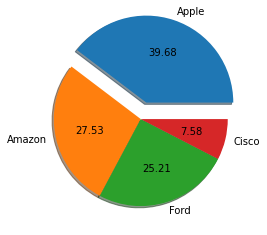

In [102]:
# Create the pie chart

mylabels = ["Apple", "Amazon", "Ford", "Cisco"]
myexplode = [0.2, 0, 0, 0] # To create an exploding wedge

plt.pie(vol_avg, labels = mylabels, explode = myexplode, shadow = True, autopct="%.2f")

plt.show() 

From the pie chart, we find that Apple has the highest average trade volume, followed by Amazon, Ford, and Cisco. 

Next, visualize the volume of stocks traded with time. 

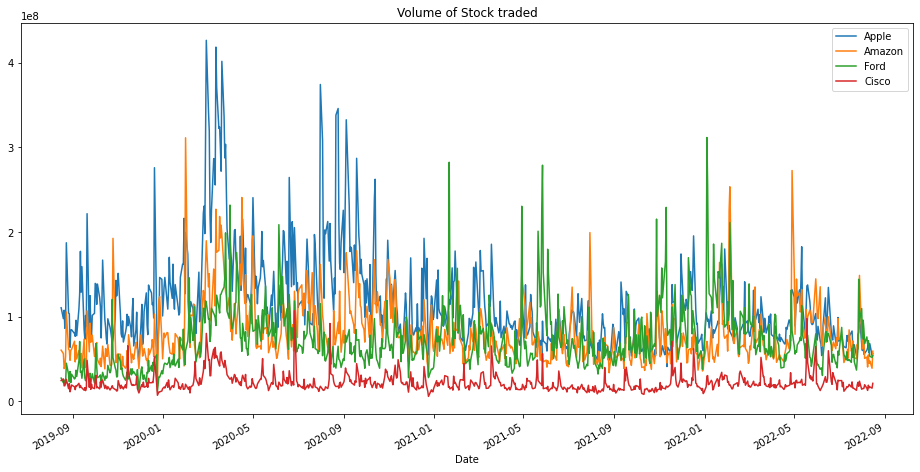

In [5]:
# Understand the volume of stocks traded with time

aapl['Volume'].plot(label = 'Apple', figsize = (16,8))
amzn['Volume'].plot(label = "Amazon")
ford['Volume'].plot(label = 'Ford')
csco['Volume'].plot(label = 'Cisco')

plt.title('Volume of Stock traded')
plt.legend()

This shows us how the stocks fluctuate with time. From the graph, we find that:

Apple is traded the most, followed by Ford and Amazon, and then Cisco. 

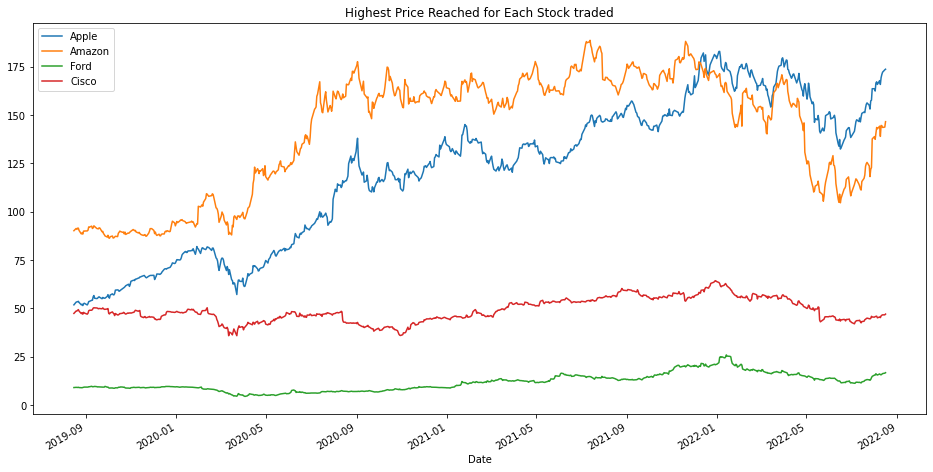

In [6]:
# Understand the highest price of stocks traded with time

aapl['High'].plot(label = 'Apple', figsize = (16,8))
amzn['High'].plot(label = "Amazon")
ford['High'].plot(label = 'Ford')
csco['High'].plot(label = 'Cisco')

plt.title('Highest Price Reached for Each Stock traded')
plt.legend()

This shows us the highest prices that each stock has reached over time. From the graph, we see that:

* Amazon has the highest price until the end of 2021, and by January 2022, the price of Amazon drops below Apple.

* Amazon and Apple show almost similar trends until the end of 2021. 

* Amazon displays mostly an increase in the highest price, with a sharp drop in price first by the end of 2021, and then before May 2022. The price begins increasing again between May and August 2022. 

* Apple displays mostly an increase in the highest price, with a sharp drop in price before May 2022. The price begins increasing again between May and August 2022.

* Ford and Cisco show almost consistent trends in the highest stock price. 

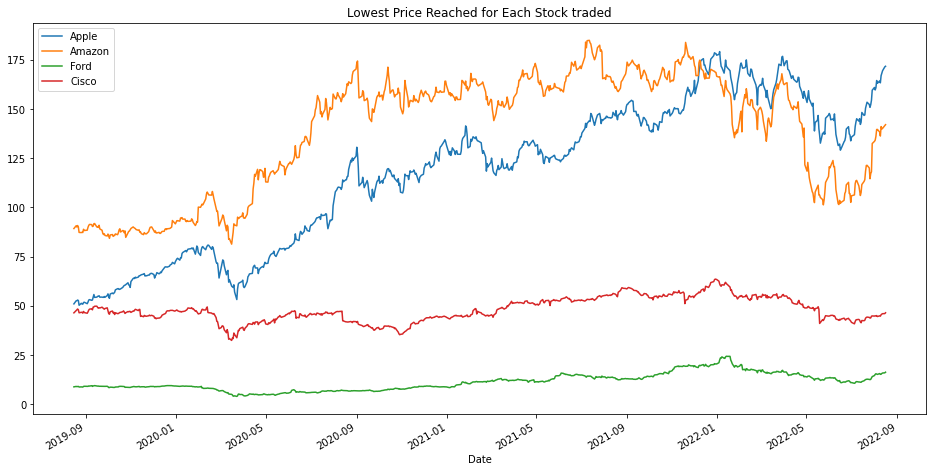

In [7]:
# Understand the lowest price of stocks traded with time

aapl['Low'].plot(label = 'Apple', figsize = (16,8))
amzn['Low'].plot(label = "Amazon")
ford['Low'].plot(label = 'Ford')
csco['Low'].plot(label = 'Cisco')

plt.title('Lowest Price Reached for Each Stock traded')
plt.legend()

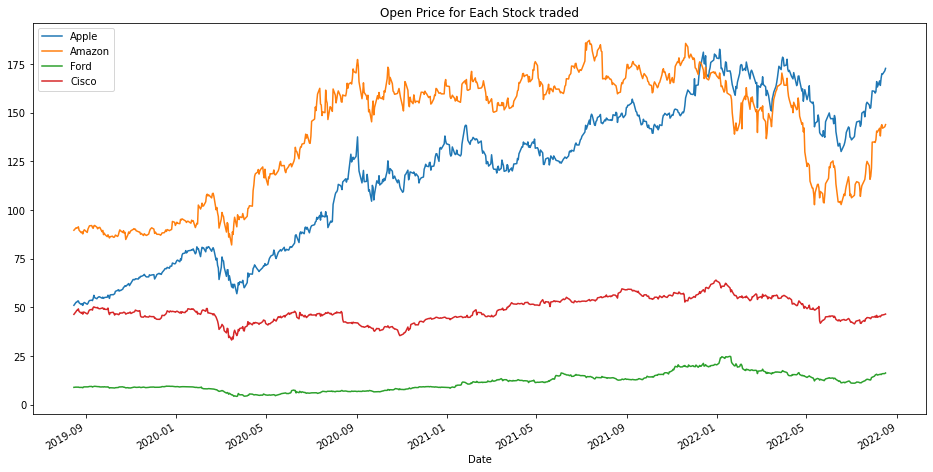

In [8]:
# Understand the open price of stocks traded with time

aapl['Open'].plot(label = 'Apple', figsize = (16,8))
amzn['Open'].plot(label = "Amazon")
ford['Open'].plot(label = 'Ford')
csco['Open'].plot(label = 'Cisco')

plt.title('Open Price for Each Stock traded')
plt.legend()

It is interesting to note that the graphs are quite similar to each other.

## Market Capitalization

This gives the value of a company that is traded in the stock market. This allows investors to understand how valuable a company is perceived to be by investors. 

The size and value of a company gives the level of risk one might expect when investing in its stock, as well as how much an investment might return over time.

It is found by calculating the product of the total number of shares with the present price of shares. 

M_Cap = Total Number of Shares * Present Shares Price

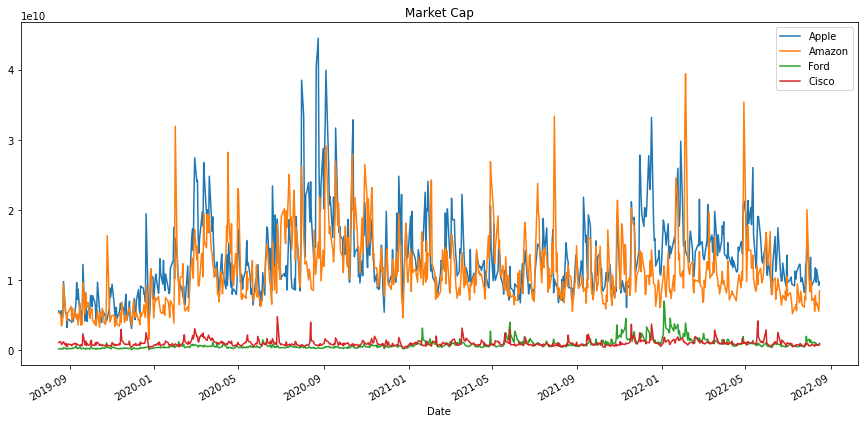

In [11]:
aapl['M_Cap'] = aapl['Open'] * aapl['Volume']
amzn['M_Cap'] = amzn['Open'] * amzn['Volume']
ford['M_Cap'] = ford['Open'] * ford['Volume']
csco['M_Cap'] = csco['Open'] * csco['Volume']

aapl['M_Cap'].plot(label = 'Apple', figsize = (15,7))
amzn['M_Cap'].plot(label = 'Amazon')
ford['M_Cap'].plot(label = 'Ford')
csco['M_Cap'].plot(label = 'Cisco')

plt.title('Market Cap')
plt.legend()

Apple and Amazon are traded more compared to Cisco and Ford. 

Thus, we can conclude that investing in Apple and Amazon would provide a lower risk, with greater returns over time.  

## Moving Averages

Moving Averages are used to deal with price fluctuations, since stock prices are extremely volatile and change rapidly over time. We can use the help of 50-day and 200-day averages to look for trends. 

"An upward trend in a moving average might signify an upswing in the price or momentum of a security, while a downward trend would be seen as a sign of decline."

"As a general guideline, if the price is above a moving average, the trend is up. If the price is below a moving average, the trend is down."


"The 200-day moving average is considered especially significant in stock trading. As long as the 50-day moving average of a stock price remains above the 200-day moving average, the stock is generally thought to be in a bullish trend, i.e., the price of the stock is expected to rise."

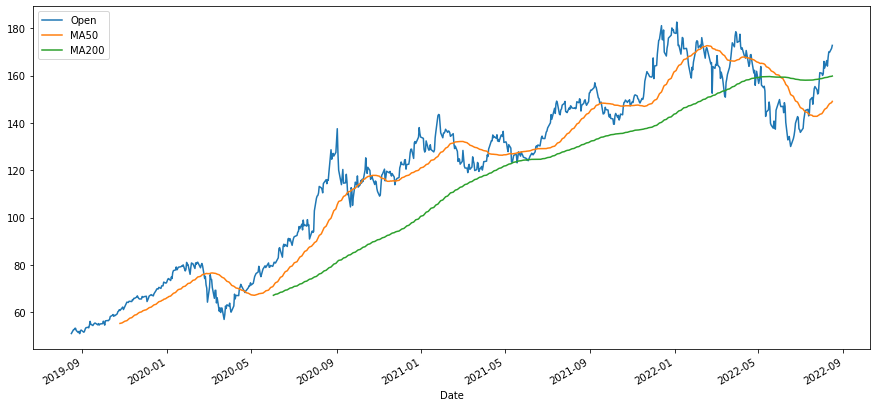

In [17]:
# Example For one stock

aapl['MA50'] = aapl['Open'].rolling(50).mean()
aapl['MA200'] = aapl['Open'].rolling(200).mean()
aapl['Open'].plot(figsize = (15,7))
aapl['MA50'].plot()
aapl['MA200'].plot()
plt.legend()

In [24]:
# Comparing all stocks

aapl['MA50'] = aapl['Open'].rolling(50).mean()
aapl['MA200'] = aapl['Open'].rolling(200).mean()

amzn['MA50'] = amzn['Open'].rolling(50).mean()
amzn['MA200'] = amzn['Open'].rolling(200).mean()

ford['MA50'] = ford['Open'].rolling(50).mean()
ford['MA200'] = ford['Open'].rolling(200).mean()

csco['MA50'] = csco['Open'].rolling(50).mean()
csco['MA200'] = csco['Open'].rolling(200).mean()

<AxesSubplot:title={'center':'Cisco'}, xlabel='Date'>

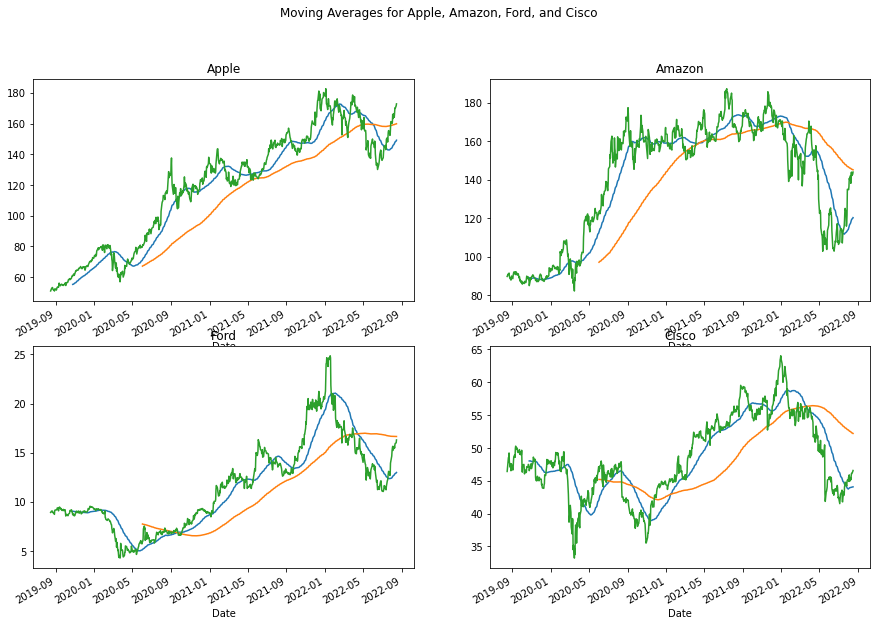

In [32]:
figure, axes = plt.subplots(2, 2, figsize = (15, 10))

figure.suptitle('Moving Averages for Apple, Amazon, Ford, and Cisco')

axes[0,0].set_title('Apple')
axes[0,1].set_title('Amazon')
axes[1,0].set_title('Ford')
axes[1,1].set_title('Cisco')

aapl['MA50'].plot(ax=axes[0, 0])
aapl['MA200'].plot(ax=axes[0, 0])
aapl['Open'].plot(ax=axes[0, 0])

amzn['MA50'].plot(ax=axes[0, 1])
amzn['MA200'].plot(ax=axes[0, 1])
amzn['Open'].plot(ax=axes[0, 1])

ford['MA50'].plot(ax=axes[1, 0])
ford['MA200'].plot(ax=axes[1, 0])
ford['Open'].plot(ax=axes[1, 0])

csco['MA50'].plot(ax=axes[1, 1])
csco['MA200'].plot(ax=axes[1, 1])
csco['Open'].plot(ax=axes[1, 1])



From the graphs, we observe that Apple and Amazon have significant upward trends, when compared to Ford and Cisco.

## Volatility and Stability

A percentage increase in stock value is the change in stock comparing that to the previous day. The bigger the value either positive or negative the volatile the stock is.

The formula is:

rt =(Pt/Pt-1) -1, where,

rt = Return,
Pt = Price at time T,
Pt-1 = Price at time T-1.


Most investors fear volatility, they want stability.

With the help of histograms, we can find out whether a stock is stable or volatile. The thicker our histogram is the more volatile the stock is.

<AxesSubplot:>

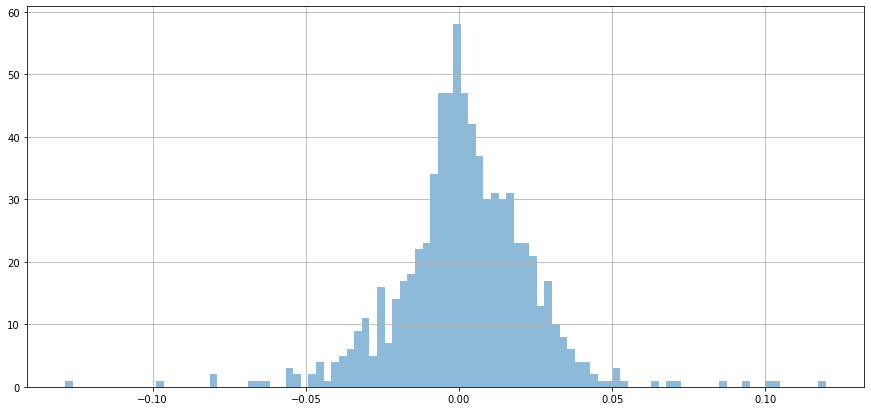

In [77]:
# Example to find the precentage increase in value for one of the stocks and then visualize it graphically.

aapl['returns'] = (aapl['Close']/aapl['Close'].shift(1)) -1
# The .shift() command in Python is used either to push all rows in a DataFrame or to use the previous row in a DataFrame.


aapl['returns'].hist(bins = 100, label = 'Apple', alpha = 0.5, figsize = (15,7))

<AxesSubplot:title={'center':'Cisco'}>

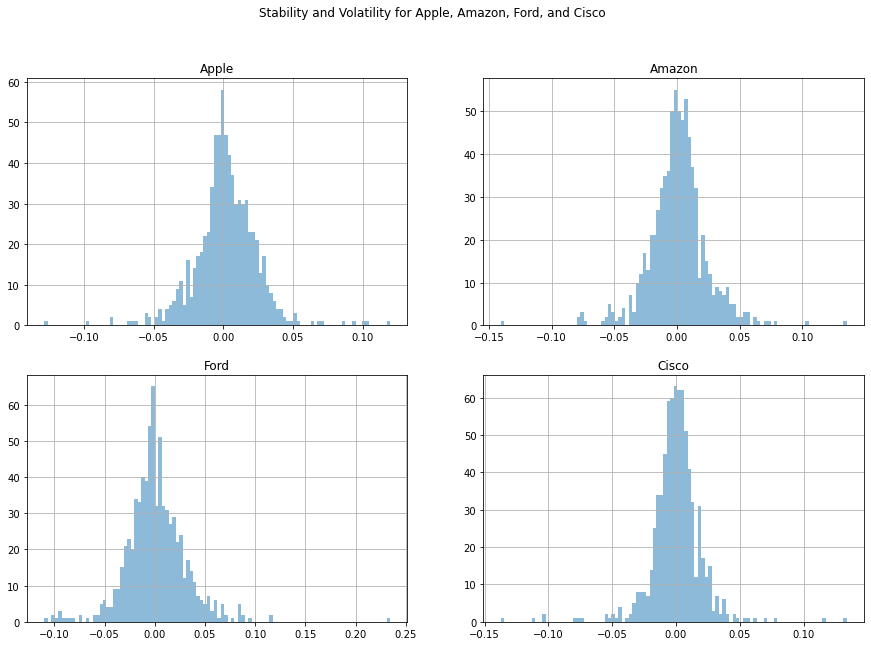

In [83]:
# Finding the volatility / stability for each of the stocks.


figure, axes = plt.subplots(2, 2, figsize = (15, 10))

figure.suptitle('Stability and Volatility for Apple, Amazon, Ford, and Cisco')

axes[0,0].set_title('Apple')
axes[0,1].set_title('Amazon')
axes[1,0].set_title('Ford')
axes[1,1].set_title('Cisco')

aapl['returns'].hist(bins = 100, label = 'Apple', alpha = 0.5, ax=axes[0, 0])

amzn['returns'].hist(bins = 100, label = 'Amazon', alpha = 0.5, ax=axes[0, 1])

ford['returns'].hist(bins = 100, label = 'Ford', alpha = 0.5, ax=axes[1, 0])

csco['returns'].hist(bins = 100, label = 'Cisco', alpha = 0.5, ax=axes[1, 1])


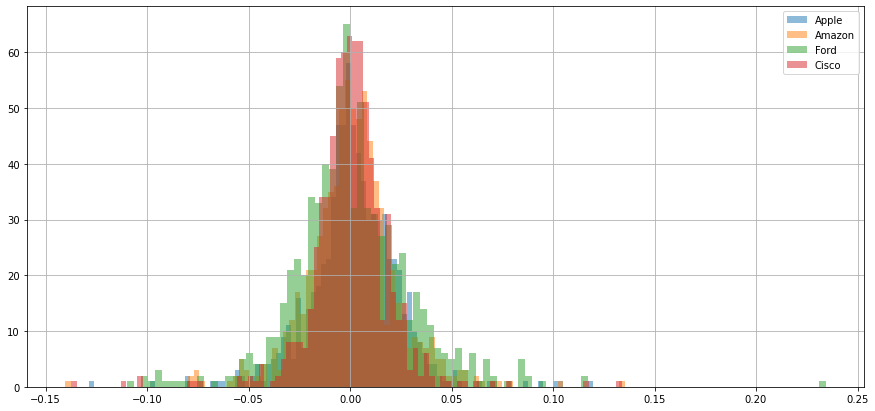

In [93]:
# Comparing the volatility / stability for all the stocks.

aapl['returns'] = (aapl['Close']/aapl['Close'].shift(1)) -1
amzn['returns'] = (amzn['Close']/amzn['Close'].shift(1))-1
ford['returns'] = (ford['Close']/ford['Close'].shift(1)) - 1
csco['returns'] = (csco['Close']/csco['Close'].shift(1)) - 1

aapl['returns'].hist(bins = 100, label = 'Apple', alpha = 0.5, figsize = (15,7))
amzn['returns'].hist(bins = 100, label = 'Amazon', alpha = 0.5)
ford['returns'].hist(bins = 100, label = 'Ford', alpha = 0.5)
csco['returns'].hist(bins = 100, label = 'Cisco', alpha = 0.5)

plt.legend()

From the graphs, we can see that Ford appears to be the most volatile stock. 

## Correlations

Find correlations between each variable of the dataframe.

In [56]:
# Example to find correlation between Opening Price and Volume Traded for a stock

corr = amzn["Open"].corr(amzn["Volume"])
print(round(corr, 2))

-0.1


In [64]:
# Correlation table for Apple

aapl_corr = aapl.corr()
aapl_corr

,Open,High,Low,Close,Adj Close,Volume,M_Cap,MA50,MA200
Open,1.000000,0.999456,0.999282,0.998514,0.998473,-0.389699,0.326017,0.963752,0.860945
High,0.999456,1.000000,0.999167,0.999268,0.999250,-0.378994,0.336450,0.965182,0.863581
Low,0.999282,0.999167,1.000000,0.999302,0.999270,-0.403850,0.309091,0.962313,0.863604
Close,0.998514,0.999268,0.999302,1.000000,0.999970,-0.392228,0.321363,0.963160,0.863806
Adj Close,0.998473,0.999250,0.999270,0.999970,1.000000,-0.393168,0.319525,0.964240,0.869220
Volume,-0.389699,-0.378994,-0.403850,-0.392228,-0.393168,1.000000,0.690513,-0.443612,-0.516711
M_Cap,0.326017,0.336450,0.309091,0.321363,0.319525,0.690513,1.000000,0.184314,-0.157413
MA50,0.963752,0.965182,0.962313,0.963160,0.964240,-0.443612,0.184314,1.000000,0.937019
MA200,0.860945,0.863581,0.863604,0.863806,0.869220,-0.516711,-0.157413,0.937019,1.000000


In [68]:
# Correlation table for Amazon

amzn_corr = amzn.corr()
amzn_corr

,Open,High,Low,Close,Adj Close,Volume,M_Cap,MA50,MA200
Open,1.000000,0.998698,0.998509,0.996875,0.996875,-0.100514,0.378208,0.922038,0.198817
High,0.998698,1.000000,0.998138,0.998541,0.998541,-0.082298,0.394047,0.923573,0.198225
Low,0.998509,0.998138,1.000000,0.998537,0.998537,-0.120048,0.358103,0.918577,0.201781
Close,0.996875,0.998541,0.998537,1.000000,1.000000,-0.100492,0.375686,0.920015,0.197467
Adj Close,0.996875,0.998541,0.998537,1.000000,1.000000,-0.100492,0.375686,0.920015,0.197467
Volume,-0.100514,-0.082298,-0.120048,-0.100492,-0.100492,1.000000,0.856926,-0.172734,-0.302292
M_Cap,0.378208,0.394047,0.358103,0.375686,0.375686,0.856926,1.000000,0.256558,-0.263668
MA50,0.922038,0.923573,0.918577,0.920015,0.920015,-0.172734,0.256558,1.000000,0.537860
MA200,0.198817,0.198225,0.201781,0.197467,0.197467,-0.302292,-0.263668,0.537860,1.000000


In [69]:
# Correlation table for Ford

ford_corr = ford.corr()
ford_corr

,Open,High,Low,Close,Adj Close,Volume,M_Cap,MA50,MA200
Open,1.000000,0.999060,0.999015,0.997932,0.997652,0.221443,0.715214,0.930754,0.734835
High,0.999060,1.000000,0.998897,0.999071,0.998908,0.239220,0.728330,0.930264,0.735410
Low,0.999015,0.998897,1.000000,0.999057,0.998609,0.206456,0.704946,0.929119,0.734386
Close,0.997932,0.999071,0.999057,1.000000,0.999688,0.224841,0.717828,0.928633,0.734562
Adj Close,0.997652,0.998908,0.998609,0.999688,1.000000,0.229635,0.718668,0.931370,0.745398
Volume,0.221443,0.239220,0.206456,0.224841,0.229635,1.000000,0.786278,0.128699,0.073988
M_Cap,0.715214,0.728330,0.704946,0.717828,0.718668,0.786278,1.000000,0.603606,0.388000
MA50,0.930754,0.930264,0.929119,0.928633,0.931370,0.128699,0.603606,1.000000,0.853239
MA200,0.734835,0.735410,0.734386,0.734562,0.745398,0.073988,0.388000,0.853239,1.000000


In [70]:
# Correlation table for Cisco

csco_corr = csco.corr()
csco_corr

,Open,High,Low,Close,Adj Close,Volume,M_Cap,MA50,MA200
Open,1.000000,0.997000,0.997554,0.994220,0.981080,-0.290141,-0.008666,0.870440,0.528770
High,0.997000,1.000000,0.996044,0.997225,0.984995,-0.261858,0.018201,0.877558,0.534919
Low,0.997554,0.996044,1.000000,0.996934,0.983260,-0.313090,-0.032449,0.861539,0.516927
Close,0.994220,0.997225,0.996934,1.000000,0.986860,-0.285430,-0.005867,0.868057,0.523950
Adj Close,0.981080,0.984995,0.983260,0.986860,1.000000,-0.271831,0.004479,0.886019,0.601711
Volume,-0.290141,-0.261858,-0.313090,-0.285430,-0.271831,1.000000,0.949913,-0.122213,0.017017
M_Cap,-0.008666,0.018201,-0.032449,-0.005867,0.004479,0.949913,1.000000,0.116400,0.173834
MA50,0.870440,0.877558,0.861539,0.868057,0.886019,-0.122213,0.116400,1.000000,0.752754
MA200,0.528770,0.534919,0.516927,0.523950,0.601711,0.017017,0.173834,0.752754,1.000000


Visualize the correlations with heatmaps.

<AxesSubplot:>

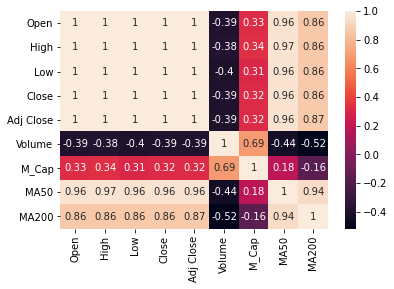

In [66]:
sns.heatmap(aapl_corr, annot=True)


<AxesSubplot:>

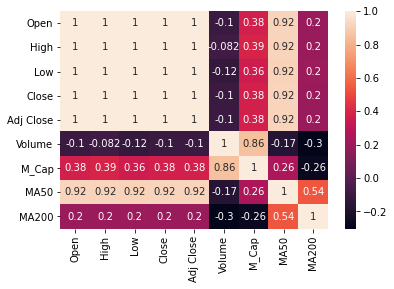

In [71]:
sns.heatmap(amzn_corr, annot=True)


<AxesSubplot:>

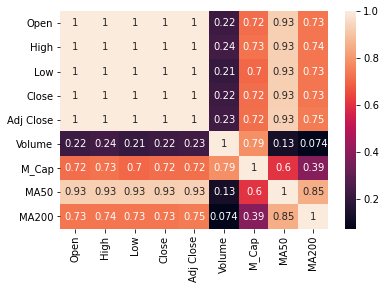

In [72]:
sns.heatmap(ford_corr, annot=True)


<AxesSubplot:>

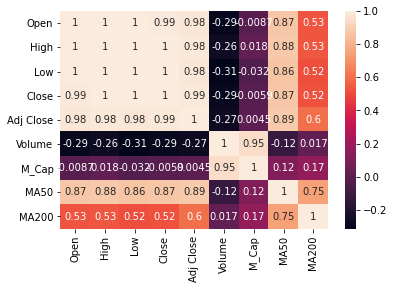

In [73]:
sns.heatmap(csco_corr, annot=True)


From the heatmaps, we find that for Apple, Amazon, and Cisco, Volume is negatively correlated to Open, High, Low, close, and Adj Close.

For Ford, Volume is positively correlated to Open, High, Low, close, and Adj Close.

## Conclusion

From our analysis, we can conclude that among the four stocks that we have chosen, Apple might be a better option for stock trading. 